In [1]:
import requests
import csv

from xml.dom.minidom import parseString

url = 'https://api.irishrail.ie/realtime/realtime.asmx/getCurrentTrainsXML'
page = requests.get(url)
doc = parseString(page.content)

print(doc.toprettyxml())

<?xml version="1.0" ?>
<ArrayOfObjTrainPositions xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns="http://api.irishrail.ie/realtime/">
	
  
	<objTrainPositions>
		
    
		<TrainStatus>N</TrainStatus>
		
    
		<TrainLatitude>51.8491</TrainLatitude>
		
    
		<TrainLongitude>-8.29956</TrainLongitude>
		
    
		<TrainCode>P536</TrainCode>
		
    
		<TrainDate>27 Feb 2025</TrainDate>
		
    
		<PublicMessage>P536\nCobh to Cork\nExpected Departure 20:30</PublicMessage>
		
    
		<Direction>To Cork</Direction>
		
  
	</objTrainPositions>
	
  
	<objTrainPositions>
		
    
		<TrainStatus>N</TrainStatus>
		
    
		<TrainLatitude>51.9212</TrainLatitude>
		
    
		<TrainLongitude>-8.17579</TrainLongitude>
		
    
		<TrainCode>P578</TrainCode>
		
    
		<TrainDate>27 Feb 2025</TrainDate>
		
    
		<PublicMessage>P578\nMidleton to Cork\nExpected Departure 20:45</PublicMessage>
		
    
		<Direction>To Cork</Direction>
		
  
	</objTrainPosition

In [2]:
with open('trainxml.xml','w') as xmlfp:
    doc.writexml(xmlfp)

print('XML file written to trainxml.xml')

XML file written to trainxml.xml


Modify the program to print out each of the trains codes. ie: find the lsitings and iterate through them to print each traincode out. 

In [7]:
# modify program to print out each of the traincodes. 


objTrainPositionsNodes = doc.getElementsByTagName("objTrainPositions")
for objTrainPositionsNode in objTrainPositionsNodes:
    traincodenode = objTrainPositionsNode.getElementsByTagName("TrainCode").item(0)
    traincode = traincodenode.firstChild.nodeValue.strip()
    print (traincode)

P536
P578
A448
P421
D835
P668
E130
P330
A875
A224
A726
A730
A808
A312
A315
A229
A478
A788
A226
A526
A227
P226
A612
A614
D222
A617
E133
E946
E255
A728
A729
E128
A616
E256
E843
P225
A527
A528
E257
E945
D423
A811
E129
E842
P767
E944
D934
E950
P622
A914
D833
E258
E848
A915
A126
A127
A449
D422
P667
A913
D933
D327
A912


In [8]:
objTrainPositionsNodes = doc.getElementsByTagName("objTrainPositions")
for objTrainPositionsNode in objTrainPositionsNodes:
    traincodenode = objTrainPositionsNode.getElementsByTagName("TrainCode").item(0)
    latitudenode = objTrainPositionsNode.getElementsByTagName("TrainLatitude").item(0)
    
    if traincodenode and traincodenode.firstChild and latitudenode and latitudenode.firstChild:
        traincode = traincodenode.firstChild.nodeValue.strip()
        latitude = latitudenode.firstChild.nodeValue.strip()
        print(f"Train Code: {traincode}, Latitude: {latitude}")


Train Code: P536, Latitude: 51.8491
Train Code: P578, Latitude: 51.9212
Train Code: A448, Latitude: 52.5009
Train Code: P421, Latitude: 53.3223
Train Code: D835, Latitude: 53.3397
Train Code: P668, Latitude: 53.378
Train Code: E130, Latitude: 53.3891
Train Code: P330, Latitude: 53.4349
Train Code: A875, Latitude: 54.1085
Train Code: A224, Latitude: 0
Train Code: A726, Latitude: 0
Train Code: A730, Latitude: 0
Train Code: A808, Latitude: 0
Train Code: A312, Latitude: 52.1396
Train Code: A315, Latitude: 52.1396
Train Code: A229, Latitude: 52.5009
Train Code: A478, Latitude: 52.6404
Train Code: A788, Latitude: 52.6587
Train Code: A226, Latitude: 52.6766
Train Code: A526, Latitude: 52.992
Train Code: A227, Latitude: 53.0371
Train Code: P226, Latitude: 53.0371
Train Code: A612, Latitude: 53.1442
Train Code: A614, Latitude: 53.1442
Train Code: D222, Latitude: 53.1454
Train Code: A617, Latitude: 53.2043
Train Code: E133, Latitude: 53.2043
Train Code: E946, Latitude: 53.2043
Train Code: E255, 

irish rail have a real time api tracker. 
https://api.irishrail.ie/realtime/realtime.asmx/getCurrentTrainsXML
this returns an xml file with the current train positions.
-easier to read in json format.
 

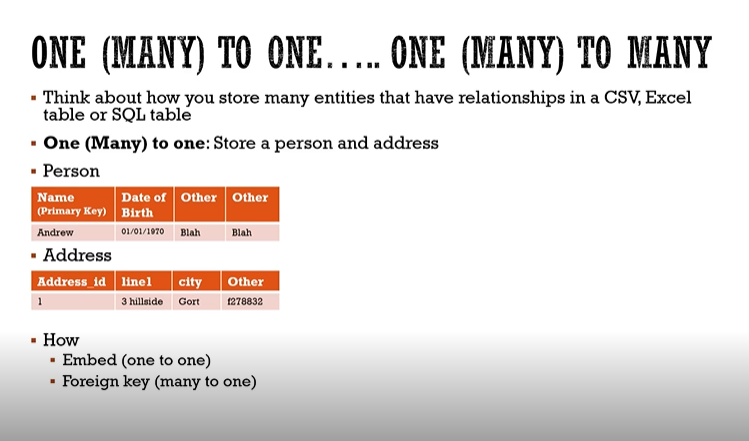

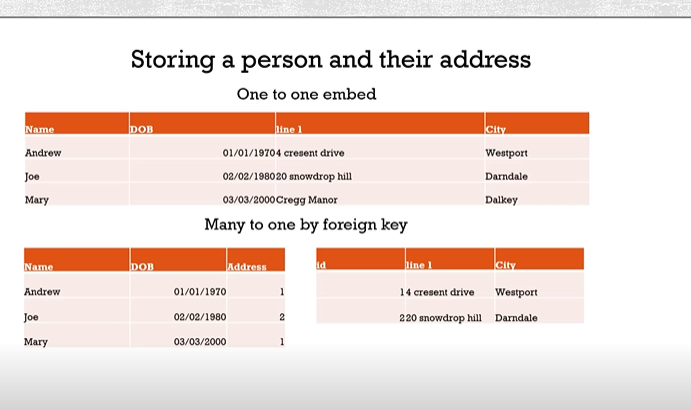

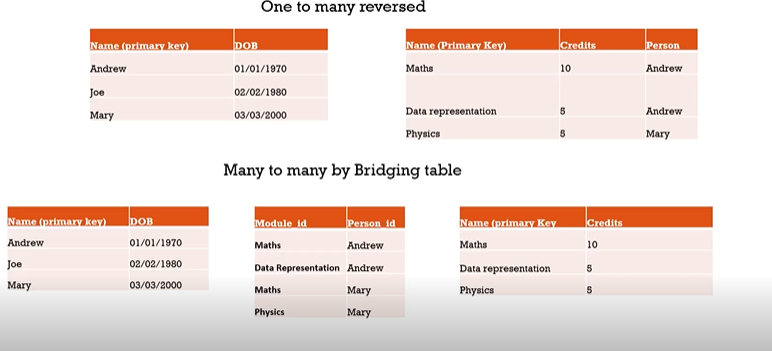

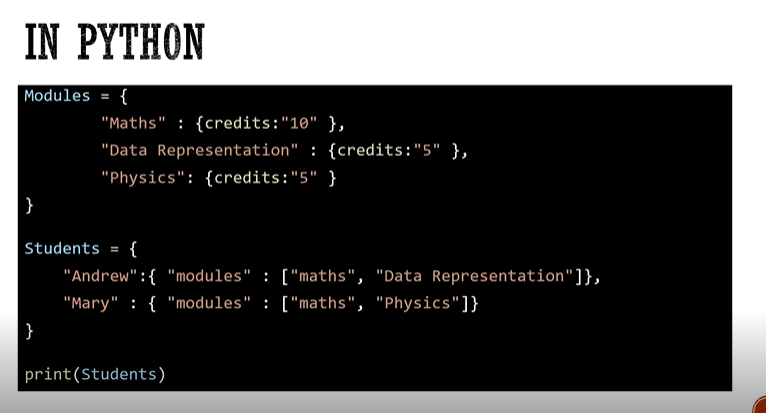